<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°04



## Problema 01

<img src="https://drive.google.com/uc?export=view&id=1LkStfZqwS8AOm_xja6KDWWQMQV2ijrDu" width = "300" align="center"/>

EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_04/data/company_sales_data.csv")
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

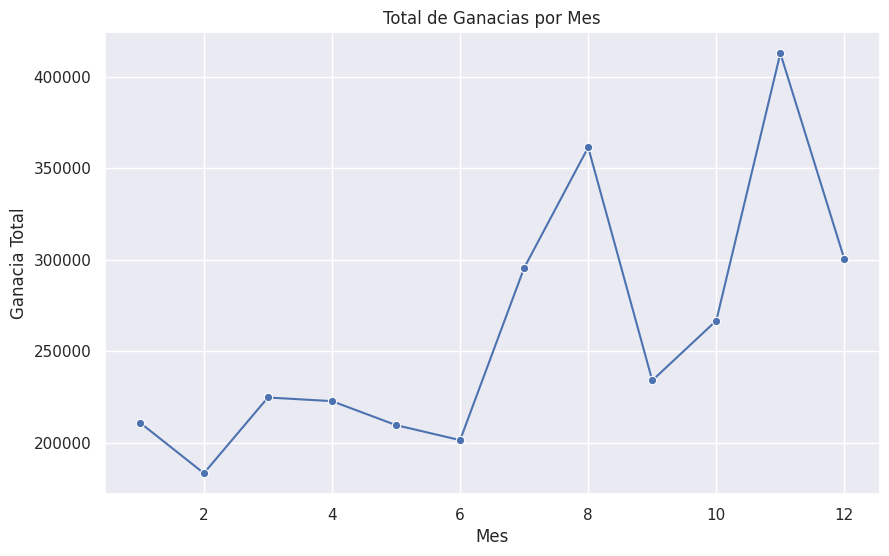

In [3]:
# Total Profit en gráfico lineal:

plt.figure(figsize=(10, 6))

sns.lineplot(
    x = 'month_number',
    y = 'total_profit',
    data = df,
    marker = 'o'
)

# Modificar el nombre de los ejes y el título
plt.xlabel('Mes')
plt.ylabel('Ganacia Total')
plt.title('Total de Ganacias por Mes')

plt.show()


2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

In [4]:
# Agrupar las columnas y contar el total
cols = ['month_number' , 'facecream' ,	'facewash' ,	'toothpaste' ,	'bathingsoap' ,	'shampoo' , 'moisturizer']

df_temp = df[cols]
df_melt = df_temp.melt(id_vars = ['month_number'])
df_melt.head()

,month_number,variable,value
0,1,facecream,2500
1,2,facecream,2630
2,3,facecream,2140
3,4,facecream,3400
4,5,facecream,3600


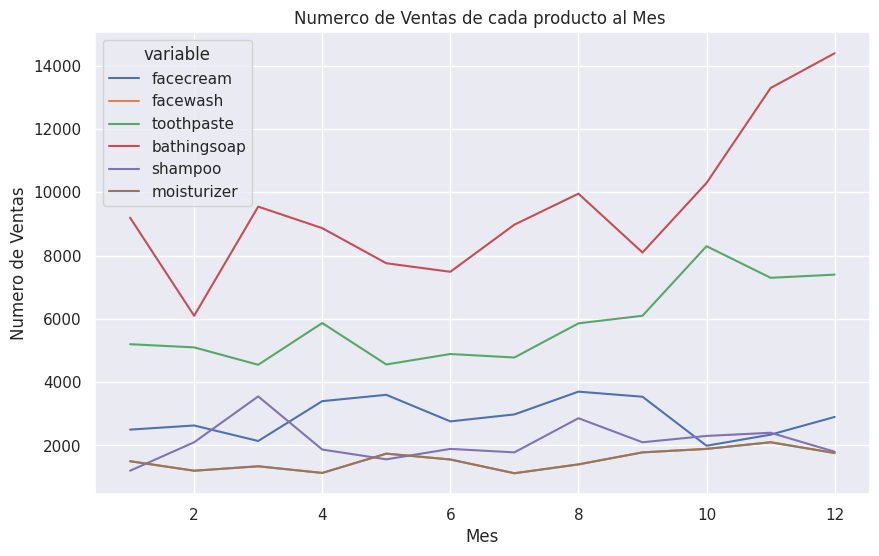

In [18]:
# Gráfico de la venta por producto

plt.figure(figsize=(10, 6))

sns.lineplot(
    data = df_melt,
    x = 'month_number',
    y = 'value',
    hue = 'variable'
)

# Modificar el nombre de los ejes y el título
plt.xlabel('Mes')
plt.ylabel('Numero de Ventas')
plt.title('Numerco de Ventas de cada producto al Mes ')

plt.show()

3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

In [7]:
# Crear un nevo data frame solo con 'facecream' y 'facewash'

df_face = df_melt.loc[lambda x: x['variable'].isin(['facecream' , 'facewash'])]
df_face.head()

,month_number,variable,value
0,1,facecream,2500
1,2,facecream,2630
2,3,facecream,2140
3,4,facecream,3400
4,5,facecream,3600


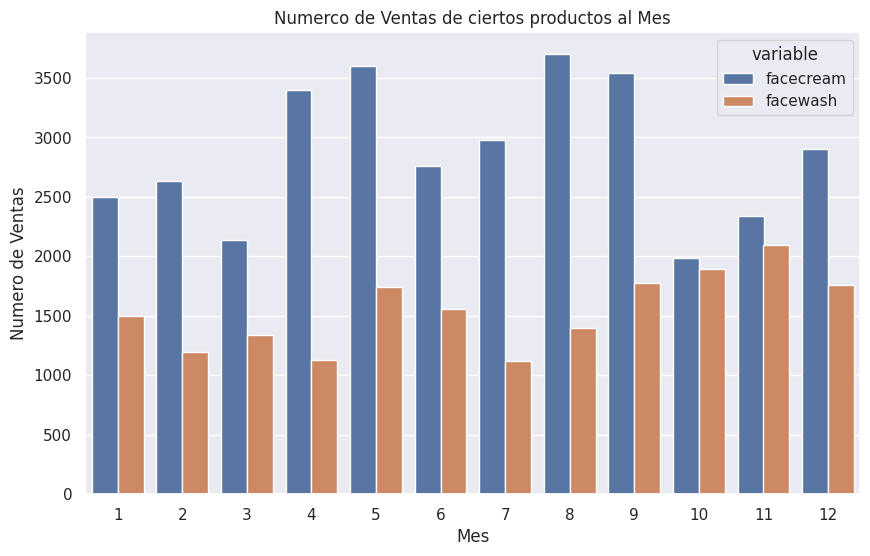

In [17]:
# Gráfico de barras de la venta de cremas

plt.figure(figsize=(10, 6))

sns.barplot(
    data = df_face,
    x = 'month_number',
    y = 'value',
    hue = 'variable'
)

# Modificar el nombre de los ejes y el título
plt.xlabel('Mes')
plt.ylabel('Numero de Ventas')
plt.title('Numerco de Ventas de ciertos productos al Mes')

plt.show()

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

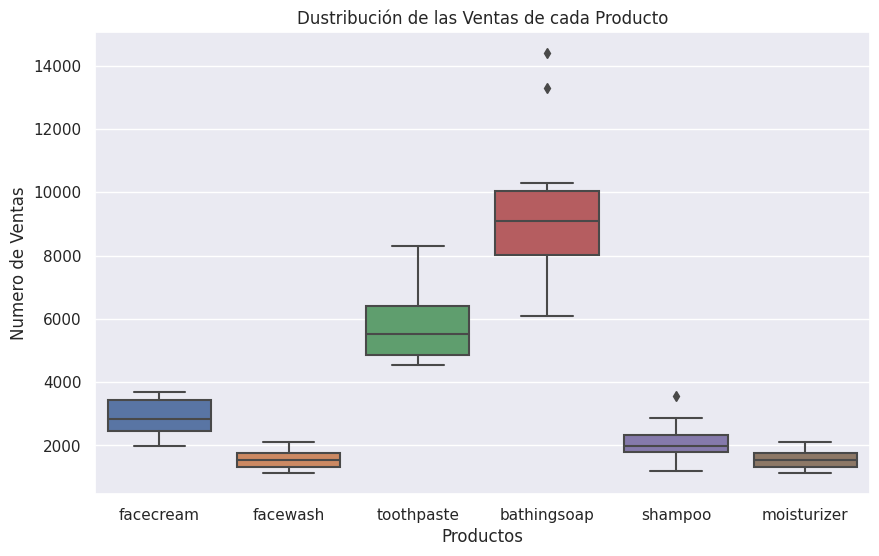

In [15]:
# Redefinimos las columnas sin los meses
cols = ['facecream' ,	'facewash' ,	'toothpaste' ,	'bathingsoap' ,	'shampoo' , 'moisturizer']

estadisticas_df = df[cols]

# Boxplot
plt.figure(figsize=(10, 6))

sns.boxplot(data = estadisticas_df)

# Modificar el nombre de los ejes y el título
plt.xlabel('Productos')
plt.ylabel('Numero de Ventas')
plt.title('Dustribución de las Ventas de cada Producto')

plt.show()

5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

In [55]:
# Organizamos un data Frame con el total de ventas
df_group = df_melt.groupby('variable')['value'].sum().reset_index()
df_group

,variable,value
0,bathingsoap,114010
1,facecream,34480
2,facewash,18515
3,moisturizer,18515
4,shampoo,25410
5,toothpaste,69910


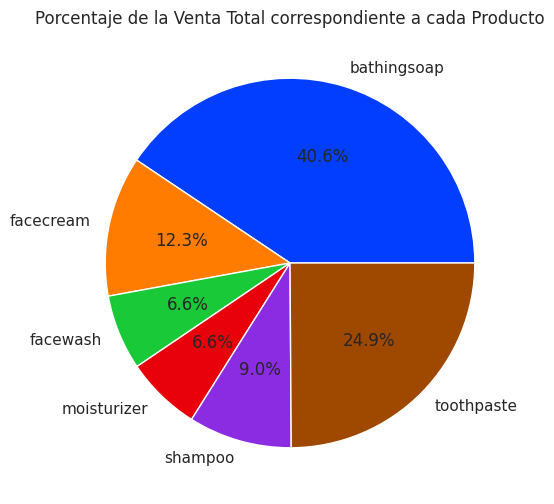

In [61]:
# Gráfico de pie
plt.figure(figsize=(10, 6))

colors = sns.color_palette('bright')
plt.pie(
    df_group['value'],
    labels = df_group['variable'],
    colors = colors,
    autopct = '%1.1f%%'
)

plt.title('Porcentaje de la Venta Total correspondiente a cada Producto')

plt.show()